# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем CSV-данные и отображаем
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
#Получение сведений о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
#Проверяем дубликаты в датафрейме - явные дубликаты отсутствуют
df.duplicated().sum()

0

In [4]:
#Проверяем пропуски в датфрейме - 101441 пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

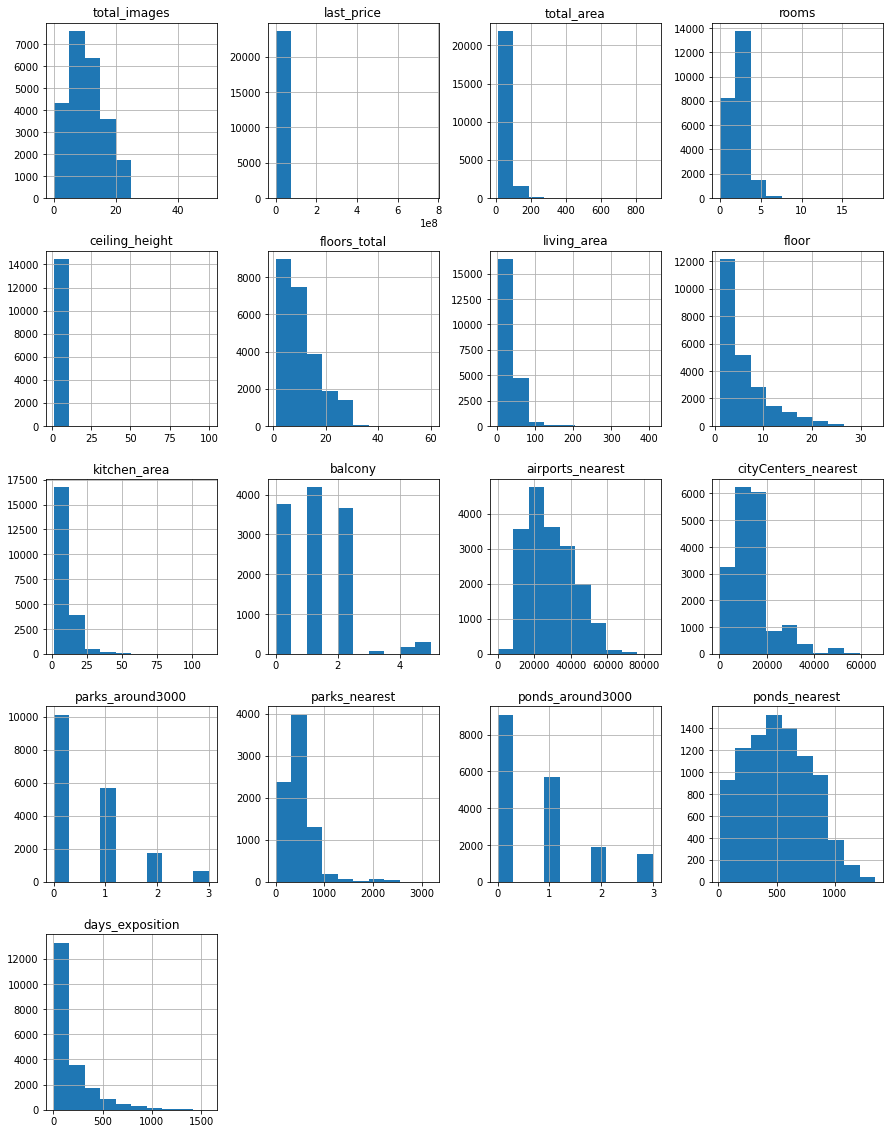

In [5]:
#Построим гистограммы
df.hist(figsize=(15, 20));

**Вывод**<br>
В датафрейме содержится 23699 записей, в которых можно наблюдать: <br>
1.Неправильные типы данных<br>
2.Пропущенные значения<br>
3.Гистограммы с аномальными значениями<br>
Необходимо провести дальнейшую обработку данных, включая обработку пропущенных значений и корректировку типов данных.

### Выполните предобработку данных

In [42]:
#2.1 Заполним пропущенные значения

# Столбец "is_apartment" имеет 20924 пропуска: Предполагаю, что если данные о квартире не указаны как апартаменты, то они таковыми не являются. Пропущенные значения можно заменить на False.
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'] = df['is_apartment'].astype(bool)

In [43]:
# Столбец "ceiling_height" имеет 9195 пропуска: Предполагаю, что пропуски о высоте потолков можно заменить медианным значением, так как это значение не должно иметь сильных выбросов
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [44]:
# Столбец "floors_total" имеет 86 пропусков: Предполагаю, что пропуски по количеству этажей можно заменить медианным значением, так как это значением не должно иметь сильных выбросов
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

In [45]:
# Пропуски в столбцах "living area" (1903 пропуска) и "kitchen_area" (2278 пропусков) можно рассчитать через долю от общей площади всего помещения "total_area"
median_living_area_ratio = (df['living_area'] / df['total_area']).median()
df['living_area'] = df['living_area'].fillna(df['total_area'] * median_living_area_ratio)

median_kitchen_area_ratio = (df['kitchen_area'] / df['total_area']).median()
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * median_kitchen_area_ratio)

In [46]:
# Столбец "balcony" имеет 11519 пропусков: Сделаю предположение, что если информации о балконе нет, то забыли указать по ошибке или посчитали пропустить
df['balcony'] = df['balcony'].fillna(0)

Cтолбец "days_exposition" имеет 3181 пропуск: так как  неизвестно, сколько дней объявление было в публикации, оставлю это поле пустым.

Географические данные (airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest): Эти данные могут быть важными, и их сложнее предсказать. Лучше оставить пропуски, так как они могут свидетельствовать об отсутствии этих объектов поблизости. Эти пропуски сами по себе могут быть значимыми.

In [11]:
#2.2 Займемся проверкой остальных столбцов на корректность форматов, наименований
# В столбце first_day_exposition необходимо преобразовать строковые данные в формат даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#После преобразования следует посчитать уникальные значения для упрощения дальнейшей обработки
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

In [12]:
# Столбец "cityCenters_nearest" не соответствует правилам именования. Переименуем
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
df['city_centers_nearest'].unique()

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

In [13]:
# Преобразуем столбец "last_price" в целочисленный формат для удобства дальнейшей работы
df['last_price'] = df['last_price'].astype(int)

In [14]:
# Такое же действие произведем со столбцом "total_area"
df['total_area'] = df['total_area'].astype(int)

In [15]:
# Значения в столбце "locality_name" имеют разный признак населенного пункта. Необходимо стандартизировать значения

df['locality_name'] = df['locality_name'].fillna('Unknown')

df['locality_name'] = (
    df['locality_name']
    .str.replace('ё','е')
    .replace(['деревня', 'поселок', 'поселок городского типа', 'садоводческое некоммерческое товарищество', 'садовое товарищество', 'село', 'городского типа', 'городской', 'коттеджный', 'при железнодорожной станции', 'станции', ], '', regex=True)
)

#После подсчета уникальных значений, были выявлены пропуски, а это значит, что их необходимо заменить
df['locality_name'] = df['locality_name'].fillna('Unknown')

set(df['locality_name'].unique())

{'  Большая Ижора',
 '  Будогощь',
 '  Важины',
 '  Вещево',
 '  Виллози',
 '  Вознесенье',
 '  Вырица',
 '  Громово',
 '  Дружная Горка',
 '  Дубровка',
 '  Ефимовский',
 '  Кивеннапа Север',
 '  Кондратьево',
 '  Корнево',
 '  Красный Бор',
 '  Кузнечное',
 '  Кузьмоловский',
 '  Лебяжье',
 '  Лесное',
 '  Лесогорский',
 '  Лужайка',
 '  Мга',
 '  Назия',
 '  Никольский',
 '  Новоселье',
 '  Павлово',
 '  Приветнинское',
 '  Приладожский',
 '  Рахья',
 '  Рощино',
 '  Рябово',
 '  Свирь',
 '  Свирьстрой',
 '  Сиверский',
 '  Синявино',
 '  Советский',
 '  Счастье',
 '  Тайцы',
 '  Токсово',
 '  Ульяновка',
 '  Федоровское',
 '  Форносово',
 '  Янино-1',
 '  имени Морозова',
 '  имени Свердлова',
 ' Агалатово',
 ' Александровская',
 ' Алексеевка',
 ' Аннино',
 ' Аро',
 ' Барышево',
 ' Батово',
 ' Бегуницы',
 ' Белогорка',
 ' Белоостров',
 ' Большая Вруда',
 ' Большая Пустомержа',
 ' Большие Колпаны',
 ' Большое Рейзино',
 ' Большой Сабск',
 ' Бор',
 ' Борисова Грива',
 ' Бугры',
 ' Ва

**Причины пропусков данных:**
1. Некоторые данные могли не считаться обязательными для заполнения, что привело к частичным пропускам.
2. Проблемы с системами сбора или хранения данных могли привести к пропускам.
3. Невнимательность при вводе данных, ошибки или намеренное игнорирование определенных полей.
4. В некоторых случаях продавец мог просто не обладать нужной информацией

**Добавляем в таблицу новые столбцы**

In [16]:
#Цена одного квадратного метра
df['price_per_square_meter'] = (df['last_price'] / df['total_area']).round(2)
df['price_per_square_meter'].unique()

array([120370.37,  83750.  ,  92785.71, ...,  72932.33, 150986.84,
        42187.5 ])

In [17]:
#Добавление столбцов с днем недели, месяцем и годом публикации объявления
# День недели (0 — понедельник, 1 — вторник и т.д.)
df['day_of_week'] = df['first_day_exposition'].dt.dayofweek
df['day_of_week'].unique()

# Месяц публикации
df['month_of_publication'] = df['first_day_exposition'].dt.month
df['month_of_publication'].unique()

# Год публикации
df['year_of_publication'] = df['first_day_exposition'].dt.year
df['year_of_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

In [18]:
#Добавление столбца с типом этажа квартиры
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['floor_type'] = df.apply(floor_type, axis=1)
df['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [19]:
#Добавление столбца с расстоянием до центра города в километрах
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000).round()
df['city_centers_nearest_km'].unique().astype(int)

array([                  16,                   19,                   14,
                          7,                    8, -9223372036854775808,
                         12,                   15,                   52,
                         33,                   31,                   11,
                         13,                   10,                    2,
                         32,                    4,                   17,
                         30,                    5,                   51,
                         50,                   24,                   18,
                          9,                   28,                    3,
                          6,                   27,                   21,
                         49,                   35,                   36,
                         34,                    1,                   29,
                         26,                   53,                   22,
                         55,                   20, 

### Проведите исследовательский анализ данных

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64


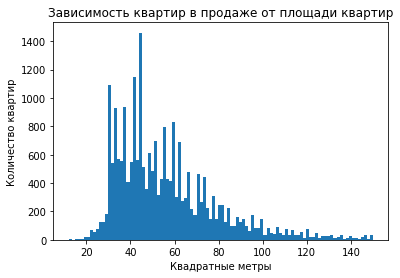

In [20]:
#Общая площадь
import matplotlib.pyplot as plt

print(df['total_area'].describe())

plt.hist(df['total_area'], bins=100, range=(12,150))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Большинство квартир имеют общую площадь от 40 до 69 м².
Квартиры с площадью менее 25 м² и более 140 м² встречаются крайне редко и были исключены как аномалии. Такие значения могут быть ошибочными или же это исключительные случаи, которые искажают общую картину.

count    23699.000000
mean        34.578214
std         22.340665
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


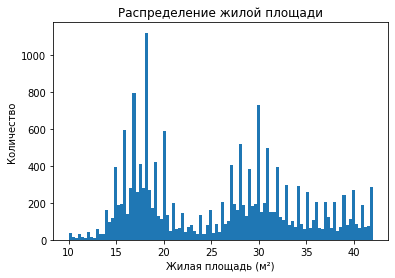

In [21]:
#Жилая площадь
print(df['living_area'].describe())

plt.hist(df['living_area'], bins=100, range=(10,42))
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь (м²)')
plt.ylabel('Количество')
plt.show()


**Вывод:**

Жилая площадь большинства квартир находится в диапазоне от 18 до 30 м².
Значения менее 12 м² и более 40 м² были удалены, так как они не характерны для обычных квартир. Это могло быть результатом ошибок при вводе данных.

count    23699.000000
mean        10.491431
std          6.029020
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


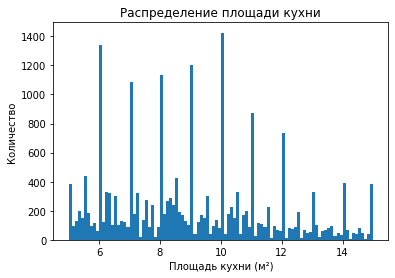

In [22]:
# Площадь кухни
print(df['kitchen_area'].describe())

plt.hist(df['kitchen_area'], bins=100, range=(5,15))
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни (м²)')
plt.ylabel('Количество')
plt.show()

**Вывод:**

Типичная площадь кухни варьируется от 6 до 12 м².
Кухни площадью менее 5 м² и более 15 м² были исключены как аномалии. Площадь менее 3 м² слишком мала, чтобы быть полноценной кухней, а площади более 15 м² встречаются крайне редко.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


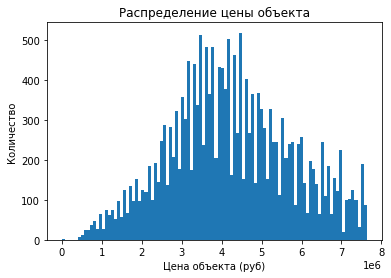

In [23]:
# Цена объекта недвижимости
print(df['last_price'].describe())

plt.hist(df['last_price'], bins=100, range=(1.219000e+04,7.630000e+06))
plt.title('Распределение цены объекта')
plt.xlabel('Цена объекта (руб)')
plt.ylabel('Количество')
plt.show()

**Вывод:**

Наиболее частые цены на квартиры составляют от 3 до 6 млн рублей.
Цены ниже 1 млн рублей и выше 8 млн рублей были удалены из анализа как выбивающиеся значения. Это может включать как ошибки в данных, так и уникальные, но крайне редкие объекты.


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


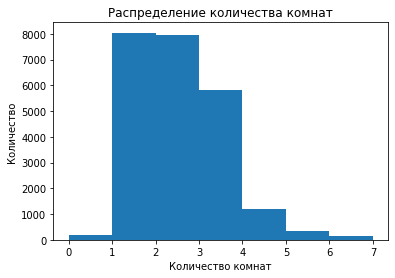

In [24]:
# Количество комнат
print(df['rooms'].describe())

plt.hist(df['rooms'], bins=7, range=(0,7))
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество')
plt.show()

**Вывод:**

Наиболее распространены квартиры с количеством комнат от 1 до 3.
Количество комнат более 6 редко встречается и может свидетельствовать о больших многокомнатных квартирах или ошибках в данных.

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


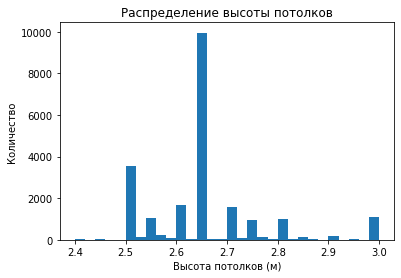

In [25]:
# Высота потолков
print(df['ceiling_height'].describe())

plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=30, range=(2.4,3))
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество')
plt.show()

**Вывод:**

Большинство квартир имеют высоту потолков от 2.5 до 3 м.
Значения высоты потолков более 3 м были скорректированы, так как вероятно, это ошибка ввода. Значения менее 2.4 м и более 3 м были исключены, так как они не соответствуют стандартам обычного жилого строительства.

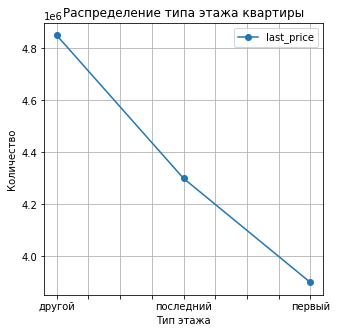

In [26]:
# Тип этажа квартиры 

(
    df.pivot_table(index='floor_type', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от этажа расположения квартиры')
)

plt.title('Распределение типа этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество')
plt.show()


**Вывод:**

Большинство квартир расположены на промежуточных этажах («другой» тип).
Квартиры на первых и последних этажах встречаются реже, что может быть связано с их меньшей популярностью среди покупателей.

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


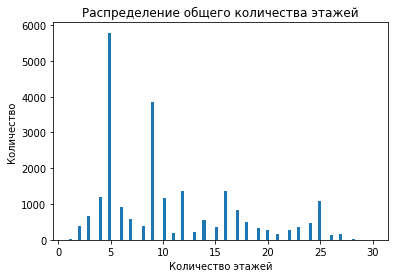

In [27]:
# Общее количество этажей в доме
print(df['floors_total'].describe())

plt.hist(df['floors_total'], bins=100, range=(1,30))
plt.title('Распределение общего количества этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество')
plt.show()

**Вывод:**

Чаще всего встречаются дома с количеством этажей от 5 до 17.
Дома с более чем 25 этажами встречаются крайне редко и были исключены из анализа. Это может быть либо ошибки ввода данных, либо очень специфические здания.


count    18180.000000
mean        14.184818
std          8.616194
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64


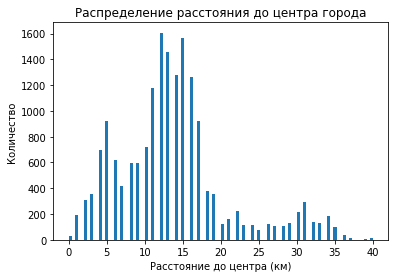

In [28]:
# Расстояние до центра города
print(df['city_centers_nearest_km'].describe())

plt.hist(df['city_centers_nearest_km'], bins=100, range=(0,40))
plt.title('Распределение расстояния до центра города')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Количество')
plt.show()

**Вывод:**

Большинство квартир расположены на расстоянии до 15 км от центра города.
Квартиры, расположенные более чем в 35 км от центра, были исключены как аномальные значения. Это может свидетельствовать либо об ошибках в данных, либо о редких объектах, которые не соответствуют основной выборке.

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


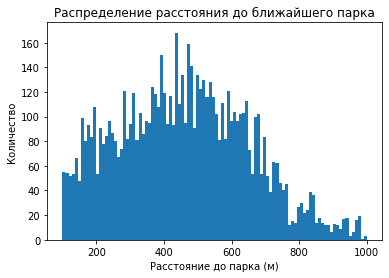

In [29]:
# Расстояние до ближайшего парка
print(df['parks_nearest'].describe())

plt.hist(df['parks_nearest'], bins=100, range=(100,1000))
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Расстояние до парка (м)')
plt.ylabel('Количество')
plt.show()

**Вывод:**

Большинство квартир расположены на расстоянии до 1 км от ближайшего парка.
Значения более 1 км были удалены, так как это может быть результатом ошибок ввода данных или нехарактерных объектов.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


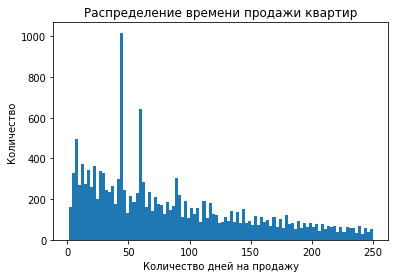

Первый квартиль (Q1, 25%): 45 дней - Быстрая продажа
Медиана (Q2): 95 дней
Третий квартиль (Q3, 75%): 232 дней - Долгая продажа
Среднее время продажи: 180 дней


In [30]:
# Анализ времени продажи квартир
print(df['days_exposition'].describe())

plt.hist(df['days_exposition'], bins=100, range=(1,250))
plt.title('Распределение времени продажи квартир')
plt.xlabel('Количество дней на продажу')
plt.ylabel('Количество')
plt.show()

# Квартильный анализ
q1 = df['days_exposition'].quantile(0.25).astype(int)  
median_days = df['days_exposition'].median().astype(int)  
q3 = df['days_exposition'].quantile(0.75).astype(int)  
mean_days = df['days_exposition'].mean().astype(int)

print(f"Первый квартиль (Q1, 25%): {q1} дней - Быстрая продажа")
print(f"Медиана (Q2): {median_days} дней")
print(f"Третий квартиль (Q3, 75%): {q3} дней - Долгая продажа")
print(f"Среднее время продажи: {mean_days} дней")

fast_sales = df.query('days_exposition <= @q1')   
normal_sales = df.query('@q1 < days_exposition <= @q3') 
slow_sales = df.query('days_exposition > @q3')  


**Вывод:**

Продажа в течение 45 дней является быстрой (1-й квартиль)<br>
Продажи от 46 до до 232 дней являются нормальными (2-ой квартиль)<br>
Продаже от 232 дней и выше являются долгими (3-ий квартиль).

**Анализ факторов, влияющих на стоимость объекта:**




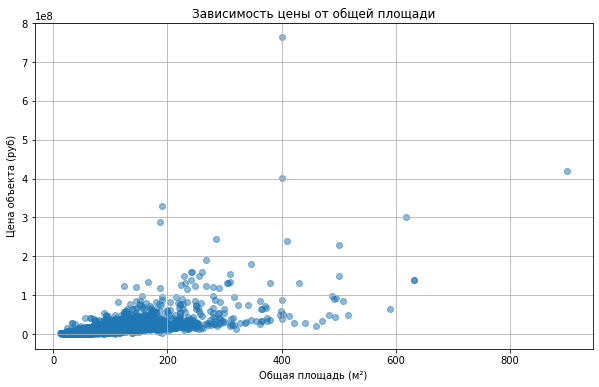

Корреляция между общей площадью и ценой: 0.65


In [31]:
#1.Зависимость цены от общей площади

plt.figure(figsize=(10, 6))
plt.scatter(df['total_area'], df['last_price'], alpha=0.5)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Цена объекта (руб)')
plt.grid(True)
plt.show()

# Корреляция
correlation_area_price = df[['total_area', 'last_price']].corr().loc['total_area', 'last_price']
print(f'Корреляция между общей площадью и ценой: {correlation_area_price:.2f}')

**Вывод**

Является самым значительным фактором, напрямую влияющим на стоимость квартиры. Больше площадь — выше цена

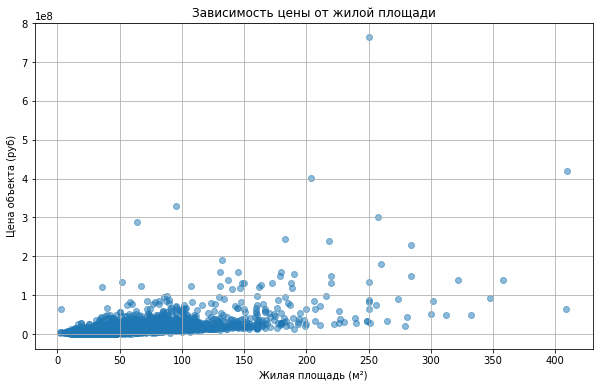

Корреляция между жилой площадью и ценой: 0.59


In [32]:
#2.Зависимость цены от жилой площади

plt.figure(figsize=(10, 6))
plt.scatter(df['living_area'], df['last_price'], alpha=0.5)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь (м²)')
plt.ylabel('Цена объекта (руб)')
plt.grid(True)
plt.show()

# Корреляция
correlation_living_area_price = df[['living_area', 'last_price']].corr().loc['living_area', 'last_price']
print(f'Корреляция между жилой площадью и ценой: {correlation_living_area_price:.2f}')

**Вывод**

Влияет на цену, но в меньшей степени по сравнению с общей площадью.

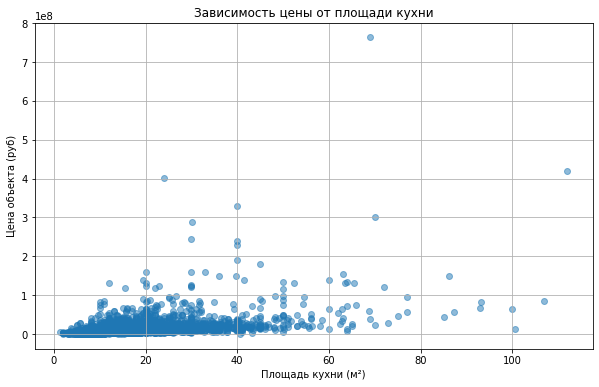

Корреляция между площадью кухни и ценой: 0.51


In [33]:
#3.Зависимость цены от площади кухни
plt.figure(figsize=(10, 6))
plt.scatter(df['kitchen_area'], df['last_price'], alpha=0.5)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни (м²)')
plt.ylabel('Цена объекта (руб)')
plt.grid(True)
plt.show()

# Корреляция
correlation_kitchen_area_price = df[['kitchen_area', 'last_price']].corr().loc['kitchen_area', 'last_price']
print(f'Корреляция между площадью кухни и ценой: {correlation_kitchen_area_price:.2f}')

**Вывод**

Имеет минимальное влияние на стоимость по сравнению с другими параметрами.

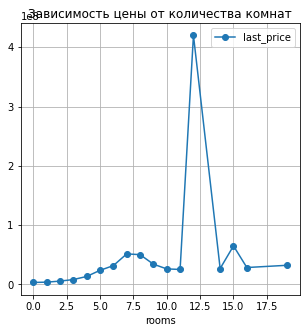

In [34]:
#3.Зависимость цены от количества комнат
(
    df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от количества комнат')
plt.show()

**Вывод**

Тоже влияет на цену, но не столь выраженно. Может зависеть от других факторов, таких как расположение.

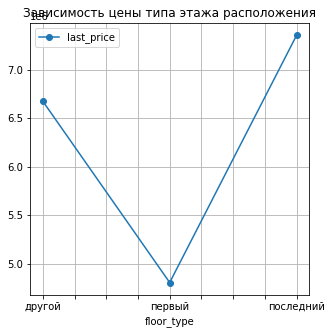

In [35]:
#4.Зависимость цены от этажа
(
    df.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены типа этажа расположения')
plt.show()

**Вывод**

Квартиры на первом этаже дешевле, на последнем — дороже; максимальные цены у квартир, не находящихся на первом и последнем этажах.

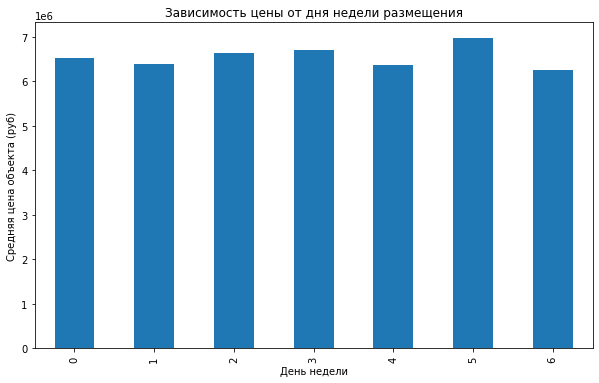

In [36]:
#5. Зависимость цены от даты размещения объявления
#5.1 День недели
plt.figure(figsize=(10, 6))
df.groupby('day_of_week')['last_price'].mean().plot(kind='bar')
plt.title('Зависимость цены от дня недели размещения')
plt.xlabel('День недели')
plt.ylabel('Средняя цена объекта (руб)')
plt.show()


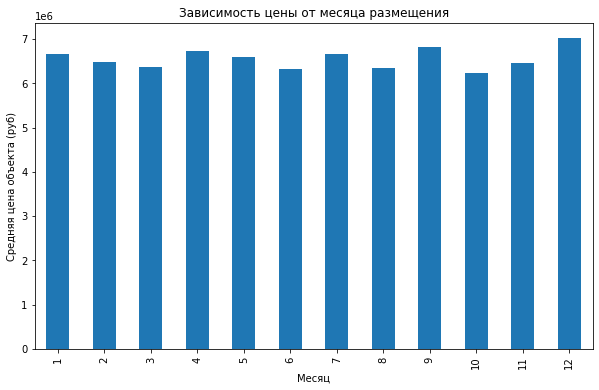

In [37]:
#5.2 Месяц размещения

plt.figure(figsize=(10, 6))
df.groupby('month_of_publication')['last_price'].mean().plot(kind='bar')
plt.title('Зависимость цены от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена объекта (руб)')
plt.show()

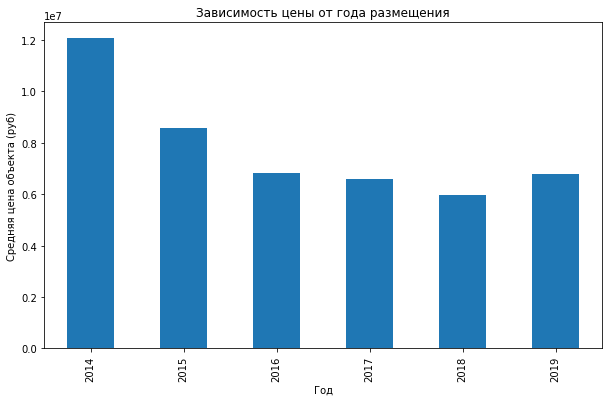

In [38]:
#5.3 Год размещения

plt.figure(figsize=(10, 6))
df.groupby('year_of_publication')['last_price'].mean().plot(kind='bar')
plt.title('Зависимость цены от года размещения')
plt.xlabel('Год')
plt.ylabel('Средняя цена объекта (руб)')
plt.show()

**Вывод:**

Имеет менее выраженное влияние на цену; сезонные колебания и общий тренд роста цен видны.


**Средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**


In [39]:
price_sm_name = df.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
price_sm_name.columns = ['count']
price_sm_name = price_sm_name.sort_values(by='count', ascending=False).head(10)
price_sm_name['price_per_square_meter'] = df.pivot_table(index='locality_name', values='price_per_square_meter').round(2)
price_sm_name.sort_values(by='price_per_square_meter', ascending=False)

,count,price_per_square_meter
locality_name,,
Санкт-Петербург,15721,115347.72
Пушкин,369,103611.36
Кудрово,299,93002.17
Парголово,327,90675.63
Мурино,556,86312.03
Шушары,440,79068.60
Колпино,338,75735.59
Гатчина,307,69045.52
Всеволожск,398,68985.24


**Вывод**

На основании сводной таблицы можно выделить населённые пункты с самой высокой и низкой средней ценой квадратного метра. Обычно более высокие цены наблюдаются в крупных городах и центральных районах.

**Средняя стоимость квартир в зависимости от расстояния до центра Санкт-Петербурга**

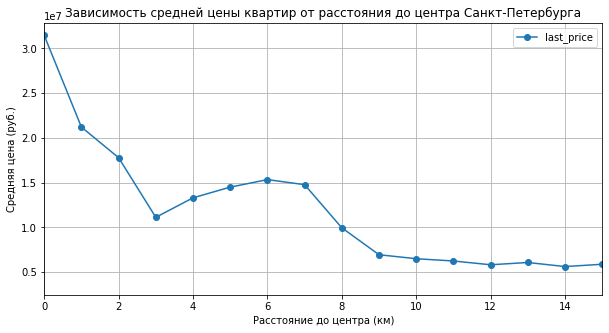

In [40]:
(
    df.query('locality_name.str.lower() == "санкт-петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)

plt.title('Зависимость средней цены квартир от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена (руб.)')
plt.grid(True)
plt.xlim(0, 15)
plt.show()

**Вывод:**

Цена объектов недвижимости в Санкт-Петербурге имеет отрицательную корреляцию с расстоянием до центра города. Чем ближе квартира к центру, тем она дороже. Этот вывод может быть использован для принятия решений как покупателями, так и инвесторами в недвижимость.

### Напишите общий вывод

В результате проведенного анализа данных о недвижимости удалось выявить несколько ключевых факторов, влияющих на стоимость объектов. Основные выводы можно сформулировать следующим образом:

**1. Основные зависимости между характеристиками квартир и их стоимостью:**

**Общая площадь квартиры** оказывает сильное влияние на её стоимость. Чем больше площадь квартиры, тем выше её цена. Эта зависимость является одной из самых значительных и прямых.

Количество комнат также влияет на цену, но его влияние несколько слабее, чем у общей площади. Это связано с тем, что квартиры с одинаковым количеством комнат могут значительно различаться по площади. Важно учитывать, что в центральных районах, где стоимость квадратного метра выше, квартиры с меньшим числом комнат могут стоить дороже крупных квартир на окраинах.

Этаж квартиры оказывает влияние на её стоимость. Квартиры на первом этаже в среднем дешевле, что может быть связано с меньшим спросом на такие квартиры из-за близости к улице и меньшего количества солнечного света. Квартиры на последних этажах также несколько дешевле, возможно, из-за возможных неудобств, связанных с лифтами или протечками крыш. Наиболее дорогостоящими являются квартиры, расположенные на средних этажах, что связано с их большей привлекательностью для покупателей.

Удалённость от центра города также имеет заметное влияние на стоимость квартир. Анализ показал, что стоимость квадратного метра снижается по мере увеличения расстояния до центра. Особенно резкий спад цен наблюдается на расстоянии до 5-7 км от центра, что может быть связано с переходом от центральных районов к спальным и менее престижным зонам.

Время продажи квартиры также является важным показателем. Среднее время продажи составляет около 180 дней, а медианное время — 95 дней. Быстрой продажей можно считать ту, которая завершилась быстрее медианного значения. Продажи, затянувшиеся дольше, чем третий квартиль (около 225 дней), можно считать долгими. Эти квартиры, возможно, имеют завышенную цену или расположены в менее привлекательных районах. Для "нормальных" продаж можно оставить промежуток между первым и третьим квартилем, что соответствует промежутку примерно от 45 до 225 дней.

**2. Рекомендации для дальнейшего анализа:**

Анализ дополнительных факторов: Следует провести более детальный анализ других факторов, таких как наличие парковки, инфраструктура района, близость к общественному транспорту, наличие ремонта и состояние квартиры, что также может значительно влиять на стоимость недвижимости.

Сегментация по районам: Стоит уделить внимание детализированному анализу цен в зависимости от районов города. В разных районах могут быть свои специфические факторы, влияющие на стоимость, такие как престижность, историческая значимость, наличие зелёных зон и т.д.

Динамика цен во времени: Интересным шагом будет исследование изменения цен на квартиры в зависимости от даты их размещения. Возможно, существуют сезонные колебания или долгосрочные тренды, которые могут быть полезны для прогнозирования.

Психологический барьер в ценах: Стоит рассмотреть влияние психологических барьеров, таких как "круглые" цифры (например, 1 млн, 5 млн рублей). Эти барьеры могут влиять на скорость продажи квартиры и её конечную стоимость.


Анализ подтвердил, что основными факторами, влияющими на стоимость недвижимости, являются её площадь, количество комнат, этаж расположения, а также расстояние до центра города. Эти результаты могут быть полезны как покупателям, так и продавцам при оценке объектов недвижимости, планировании сделок и выборе подходящих условий для покупки или продажи квартир.
